![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)



En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

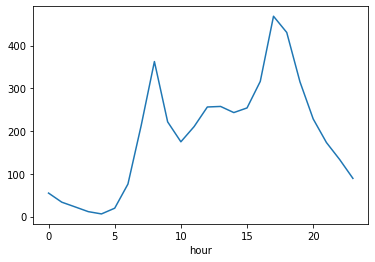

In [6]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

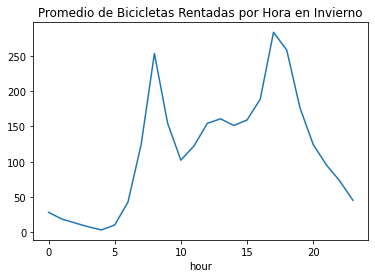

In [7]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
import matplotlib.pyplot as plt
bikes[bikes['season'] == 1].groupby('hour')['total'].mean().plot(title='Promedio de Bicicletas Rentadas por Hora en Invierno')


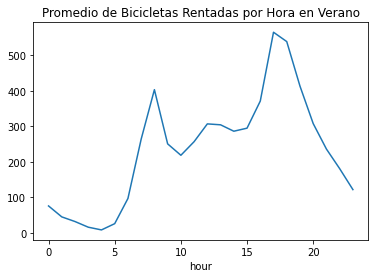

In [8]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes[bikes['season'] == 3].groupby('hour')['total'].mean().plot(title='Promedio de Bicicletas Rentadas por Hora en Verano')


### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [9]:
# Celda 3
import pandas as pd
from sklearn.linear_model import LinearRegression

# Asumiendo que 'bikes' es tu DataFrame
# Convertir la variable 'season' en variables dummy
season_dummies = pd.get_dummies(bikes['season'], prefix='season')

# Añadir la variable 'hour' como numérica
X = pd.concat([season_dummies, bikes['hour']], axis=1)
y = bikes['total']

# Ajustar el modelo de regresión lineal
lm = LinearRegression()
lm.fit(X, y)

# Imprimir los coeficientes
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': lm.coef_})
print(coefficients)


    feature   coefficient
0  season_1 -8.284148e+13
1  season_2 -8.284148e+13
2  season_3 -8.284148e+13
3  season_4 -8.284148e+13
4      hour  1.055096e+01


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [16]:
import pandas as pd


# Calcular los promedios de alquiler de bicicletas por hora y temporada
average_totals = bikes.groupby(['hour', 'season'])['total'].mean().unstack()

# Preparar el diccionario para el árbol de decisiones
average_totals_dict = {
    'madrugada': {},
    'mañana': {},
    'mediodía': {},
    'tarde': {},
    'noche': {}
}

# Llenar el diccionario con los promedios reales
for hour in range(24):
    for season in range(1, 5):
        if 0 <= hour < 6:
            time_of_day = 'madrugada'
        elif 6 <= hour < 12:
            time_of_day = 'mañana'
        elif 12 <= hour < 18:
            time_of_day = 'mediodía'
        elif 18 <= hour < 24:
            time_of_day = 'tarde'
        else:
            time_of_day = 'noche'
        
        # Asegúrate de que 'season' y 'hour' existan en el DataFrame
        if season in average_totals.columns and hour in average_totals.index:
            average_totals_dict[time_of_day][season] = average_totals.loc[hour, season]

# Ahora puedes usar este diccionario para hacer predicciones
def manual_decision_tree(hour, season):
    if 0 <= hour < 6:
        time_of_day = 'madrugada'
    elif 6 <= hour < 12:
        time_of_day = 'mañana'
    elif 12 <= hour < 18:
        time_of_day = 'mediodía'
    elif 18 <= hour < 24:
        time_of_day = 'tarde'
    else:
        time_of_day = 'noche'
    
    # Acceder al promedio usando el diccionario
    return average_totals_dict.get(time_of_day, {}).get(season, "No data")

# Ejemplo de uso
predicted_total = manual_decision_tree(14, 3)  # Para la hora 14 (2 PM) en la temporada 3 (verano)
print(predicted_total)



565.3859649122807


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [22]:
# Celda 5
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# Asumiendo que 'bikes' es tu DataFrame y que ya contiene 'hour' y 'season' apropiadamente procesados
X = bikes[['hour', 'season']]  # Predictor variables
y = bikes['total']  # Response variable

# Codificar 'season' usando one-hot encoding si aún no se ha hecho
X = pd.get_dummies(X, columns=['season'], drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el árbol de decisiones
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Hacer predicciones en el conjunto de test
y_pred = tree_reg.predict(X_test)

# Calcular y mostrar el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f'Error Cuadrático Medio: {mse}')




Error Cuadrático Medio: 13454.101382166964


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [17]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [28]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [29]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [30]:
# Celda 6
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Entrenar el árbol de decisión con calibración de al menos un parámetro (profundidad máxima)
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)

# Entrenar la regresión logística
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Hacer predicciones con el árbol de decisión
y_pred_tree = tree_clf.predict(X_test)

# Hacer predicciones con la regresión logística
y_pred_log = log_reg.predict(X_test)

# Calcular y mostrar la precisión y el F1-Score para el árbol de decisión
accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_score_tree = f1_score(y_test, y_pred_tree)
print(f'Árbol de Decisión - Accuracy: {accuracy_tree}, F1-Score: {f1_score_tree}')

# Calcular y mostrar la precisión y el F1-Score para la regresión logística
accuracy_log = accuracy_score(y_test, y_pred_log)
f1_score_log = f1_score(y_test, y_pred_log)
print(f'Regresión Logística - Accuracy: {accuracy_log}, F1-Score: {f1_score_log}')


Árbol de Decisión - Accuracy: 0.64, F1-Score: 0.6633416458852869
Regresión Logística - Accuracy: 0.614, F1-Score: 0.6106254203093476


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [31]:
# Celda 7
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score


# Entrenar 100 árboles de decisión con max_depth
trees_depth = [DecisionTreeClassifier(max_depth=3, random_state=42+i) for i in range(100)]
for tree in trees_depth:
    tree.fit(X_train, y_train)

# Entrenar 100 árboles de decisión con min_samples_leaf
trees_samples = [DecisionTreeClassifier(min_samples_leaf=4, random_state=142+i) for i in range(100, 200)]
for tree in trees_samples:
    tree.fit(X_train, y_train)

# Entrenar 100 regresiones logísticas
log_models = [LogisticRegression(random_state=242+i) for i in range(200, 300)]
for log_model in log_models:
    log_model.fit(X_train, y_train)

# Crear votaciones individuales para cada modelo
votes = []
for tree in trees_depth:
    votes.append(tree.predict(X_test))
for tree in trees_samples:
    votes.append(tree.predict(X_test))
for log_model in log_models:
    votes.append(log_model.predict(X_test))

# Sumar las votaciones para obtener una votación mayoritaria
# Considerando que '1' es la clase positiva y '0' la clase negativa
votes = np.array(votes)
majority_vote = np.where(votes.sum(axis=0) >= 150, 1, 0)  # Umbral de 150 para la mayoría

# Evaluar el desempeño de la votación mayoritaria
accuracy = accuracy_score(y_test, majority_vote)
f1 = f1_score(y_test, majority_vote)
print(f'Votación Mayoritaria - Accuracy: {accuracy}, F1-Score: {f1}')


Votación Mayoritaria - Accuracy: 0.6366666666666667, F1-Score: 0.6137491141034727


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [32]:
# Celda 8
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score



# Crear los 300 modelos con los parámetros específicos dados
models = [('tree_depth_'+str(i), DecisionTreeClassifier(max_depth=3, random_state=42+i))
          for i in range(100)] + \
         [('tree_samples_'+str(i), DecisionTreeClassifier(min_samples_leaf=4, random_state=142+i))
          for i in range(100, 200)] + \
         [('log_reg_'+str(i), LogisticRegression(random_state=242+i))
          for i in range(200, 300)]

# Crear el ensamble de votación ponderada
# Los pesos deben reflejar la mayor confianza en los árboles de decisión en comparación con la regresión logística
weights = [1]*100 + [1]*100 + [0.1]*100
ensemble = VotingClassifier(estimators=models, voting='soft', weights=weights)

# Entrenar el ensamble
ensemble.fit(X_train, y_train)

# Hacer predicciones con el ensamble
y_pred_ensemble = ensemble.predict(X_test)

# Calcular y mostrar las métricas de Accuracy y F1-Score
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
f1_score_ensemble = f1_score(y_test, y_pred_ensemble)
print(f'Votación Ponderada - Accuracy: {accuracy_ensemble}, F1-Score: {f1_score_ensemble}')


Votación Ponderada - Accuracy: 0.5773333333333334, F1-Score: 0.5812417437252311


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [ ]:
# Celda 9